## Modelos de regresión lineal
Modelo con datos simulados

* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5) normal de media 1.5 y desviación estandar 2.5
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8) Error centrado en media cero para evitar desplazamientos en el modelo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = 1.5 + 2.5*np.random.randn(100)

(array([ 3.,  2.,  9., 13., 16., 18., 11., 15., 10.,  3.]),
 array([-4.92518212, -3.71229691, -2.4994117 , -1.28652649, -0.07364128,
         1.13924392,  2.35212913,  3.56501434,  4.77789955,  5.99078476,
         7.20366997]),
 <a list of 10 Patch objects>)

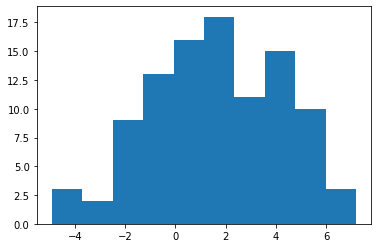

In [12]:
plt.hist(x)

In [13]:
res = 0 + 0.8 * np.random.randn(100) #Errores destribuidos en una media 0 y desviación 0.8

In [14]:
y_pred = 5 + 1.9 * x

In [17]:
y_act = 5 + 1.9*x + res

In [18]:
#Para crear el DataFrame de datos necesitamos nuestros valores en forma de lista
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [19]:
data = pd.DataFrame(
    { "x":x_list,
     "y_predic": y_pred_list,
     "y_actual":y_act_list
 
    
})

In [20]:
data.head()

,x,y_predic,y_actual
0,0.722941,6.373589,7.426255
1,0.968520,6.840189,5.408510
2,-1.167249,2.782227,2.917804
3,4.784531,14.090610,14.494277
4,4.715672,13.959777,13.174653


In [21]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

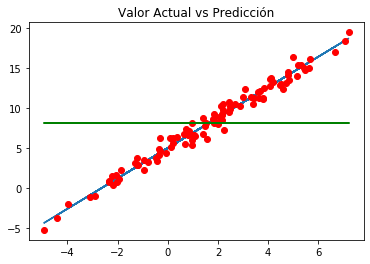

In [23]:
%matplotlib inline
plt.plot(data["x"],data["y_predic"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Qué tan buena es la predicción?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [27]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_predic"]-y_m)**2# creamos nuevas columnas dentro del data frame con 
                                            #estos valores
data["SSD"]=(data["y_predic"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [28]:
data.head()

,x,y_predic,y_actual,SSR,SSD,SST
0,0.722941,6.373589,7.426255,3.203187,1.108106,0.543285
1,0.968520,6.840189,5.408510,1.750712,2.049703,7.589052
2,-1.167249,2.782227,2.917804,28.956305,0.018381,27.515584
3,4.784531,14.090610,14.494277,35.132600,0.162948,40.080848
4,4.715672,13.959777,13.174653,33.598758,0.616421,25.113316


In [29]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [30]:
SSR, SSD, SST

(2519.7437692973103, 56.080437974497116, 2525.979020661375)

In [31]:
R2 = SSR/SST

In [32]:
R2 #Qué tan buena es la predicción

0.9975315506134202

(array([ 3.,  4., 11., 15., 22., 16., 17.,  8.,  2.,  2.]),
 array([-1.87887302, -1.48990892, -1.10094482, -0.71198072, -0.32301661,
         0.06594749,  0.45491159,  0.8438757 ,  1.2328398 ,  1.6218039 ,
         2.01076801]),
 <a list of 10 Patch objects>)

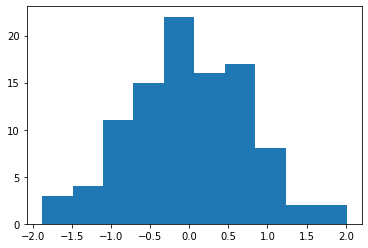

In [34]:

plt.hist(data["y_predic"]-data["y_actual"])